In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/grid.h5"
tracks = pd.read_hdf(filename, "tracks")
tracks.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell
track                                                              
7000     0.92329  0.279311  0.001829  1.608258  0.000000   0.006041
7001     1.72329  0.229311  0.010871  2.308258  0.012396   0.006041
7002     2.12329  0.304311  0.004172  2.658258  0.015861   0.006041
7003     1.32329  0.254311  0.024469  1.958258  0.002481   0.006041
7004     1.12329  0.291811  0.006519  2.133258  0.000000   0.006041

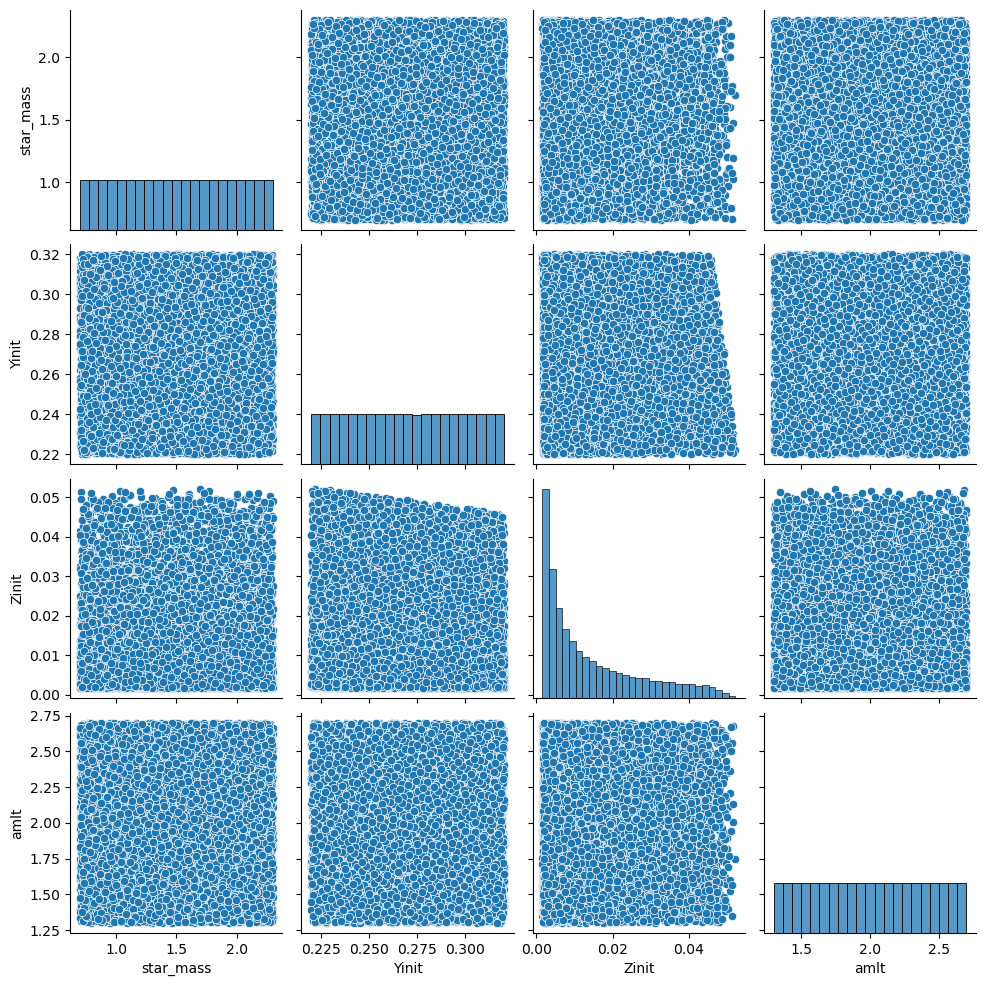

In [3]:
vars = ["star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(tracks, vars=vars);

In [4]:
stars = pd.read_hdf(filename, "stars")
stars.head()

star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  
track star                                  
7000  1     0.078416  148.565794  1.129515  
      2     0.077135  149.148739  1.131800  
      3     0.075916  149.362908  1.132830  
      4     0.075178  148.552167  1.130613  
      5     0.075810  148.331713  1.129892

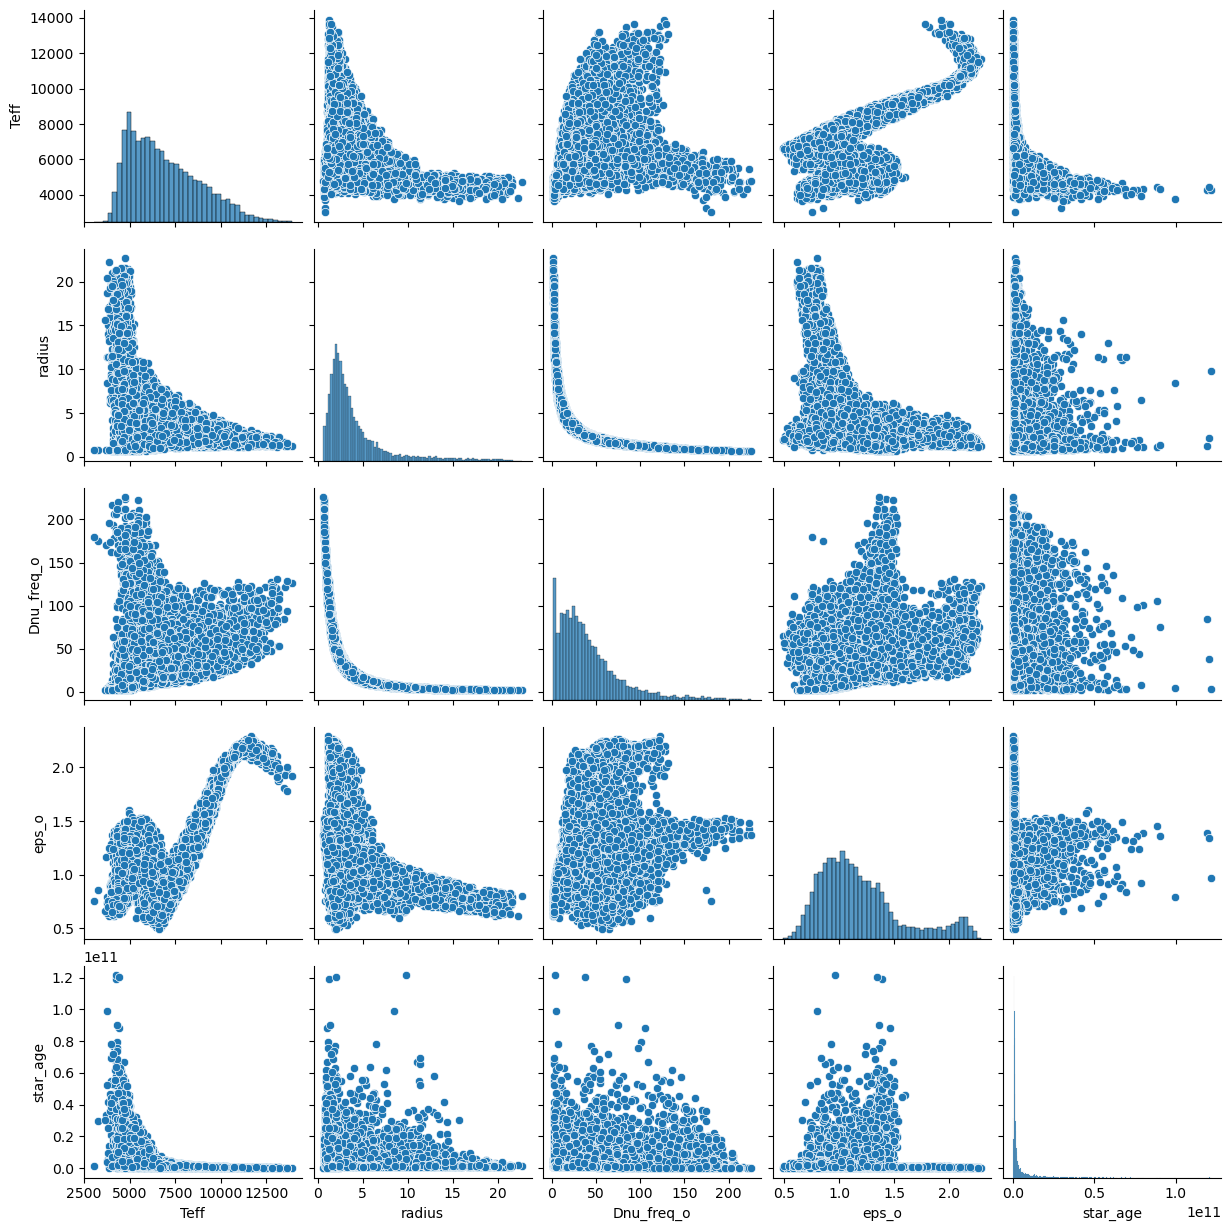

In [5]:
num_samples = 10000
vars = ["Teff", "radius", "Dnu_freq_o", "eps_o", "star_age"]
sns.pairplot(stars.sample(num_samples), vars=vars);

In [11]:
mask = (stars.star_age < 2e10)
grid = tracks.join(stars.loc[mask])

In [14]:
grid.head()

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
track star                                                                 
7000  1       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      2       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      3       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      4       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   
      5       0.92329  0.279311  0.001829  1.608258       0.0   0.006041   

                star_age    radius         Teff  center_h1    log_LHe  \
track star                                                              
7000  1     2.220454e+07  0.893151  6382.509287   0.718192 -45.291905   
      2     2.300916e+07  0.891027  6377.312552   0.718122 -45.308912   
      3     2.397470e+07  0.890320  6373.785487   0.718037 -45.328570   
      4     3.019433e+07  0.893682  6371.412400   0.717474 -45.392646   
      5     3.259691e+07  0.894573  6371.453759   0.717253 -45.402736   

            log_Lnuc  Dnu_freq_o     eps_o  
track star                                  
7000  1     0.078416  148.565794  1.129515  
      2     0.077135  149.148739  1.131800  
      3     0.075916  149.362908  1.132830  
      4     0.075178  148.552167  1.130613  
      5     0.075810  148.331713  1.129892

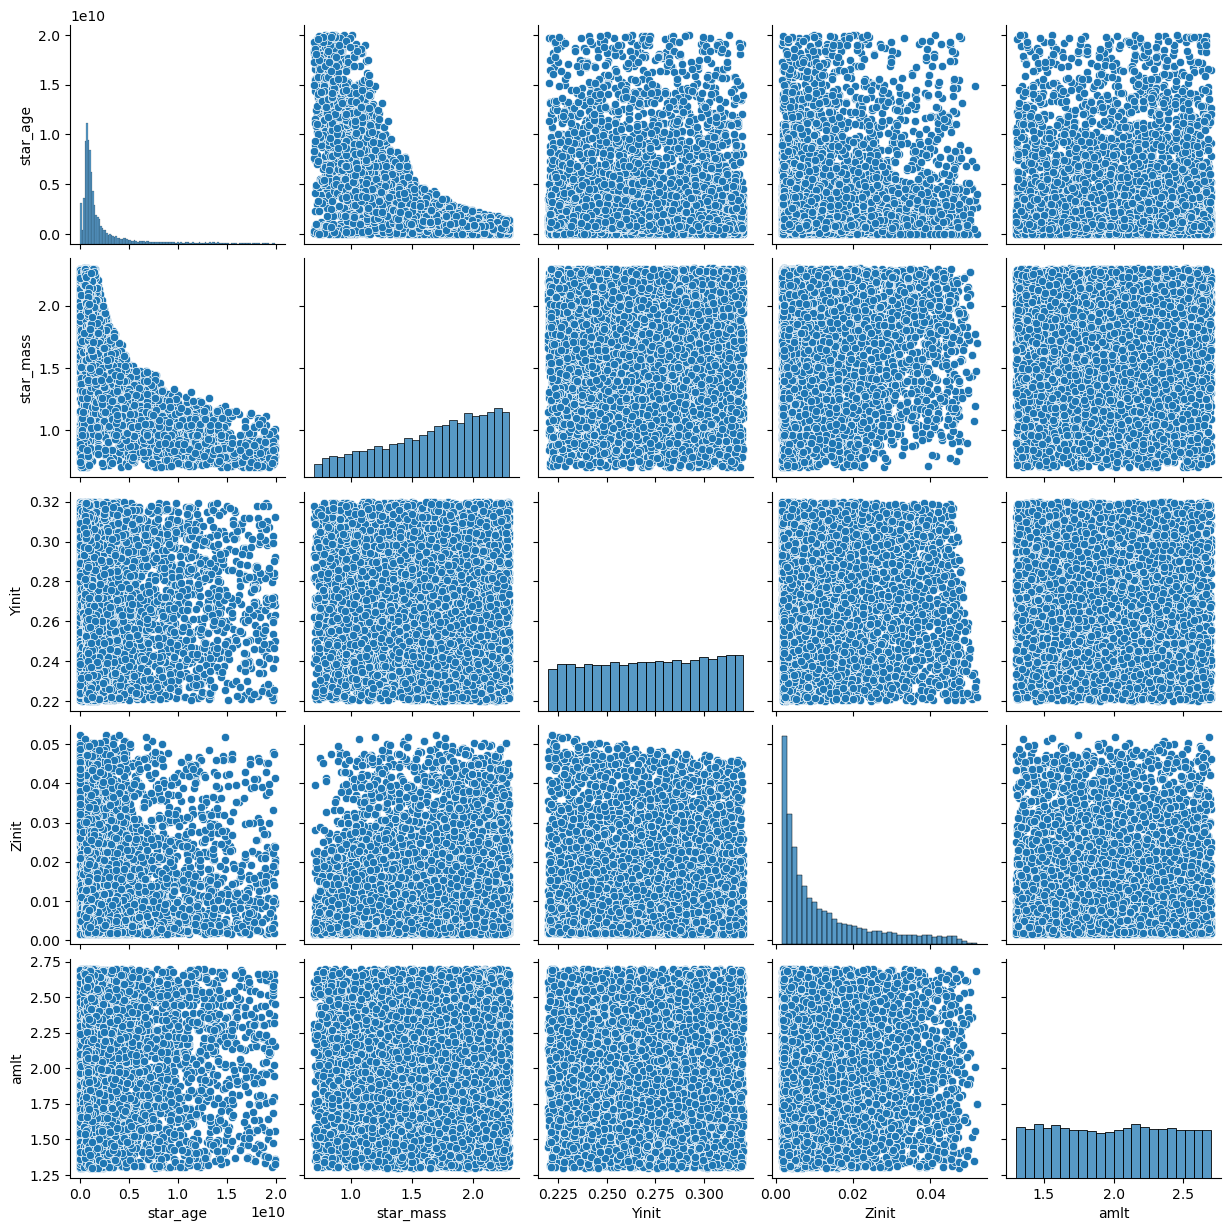

In [15]:
num_samples = 10000
vars = ["star_age", "star_mass", "Yinit", "Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [19]:
grid["log_Zinit"] = np.log10(grid.Zinit)
grid["log_age"] = np.log10(grid.star_age)

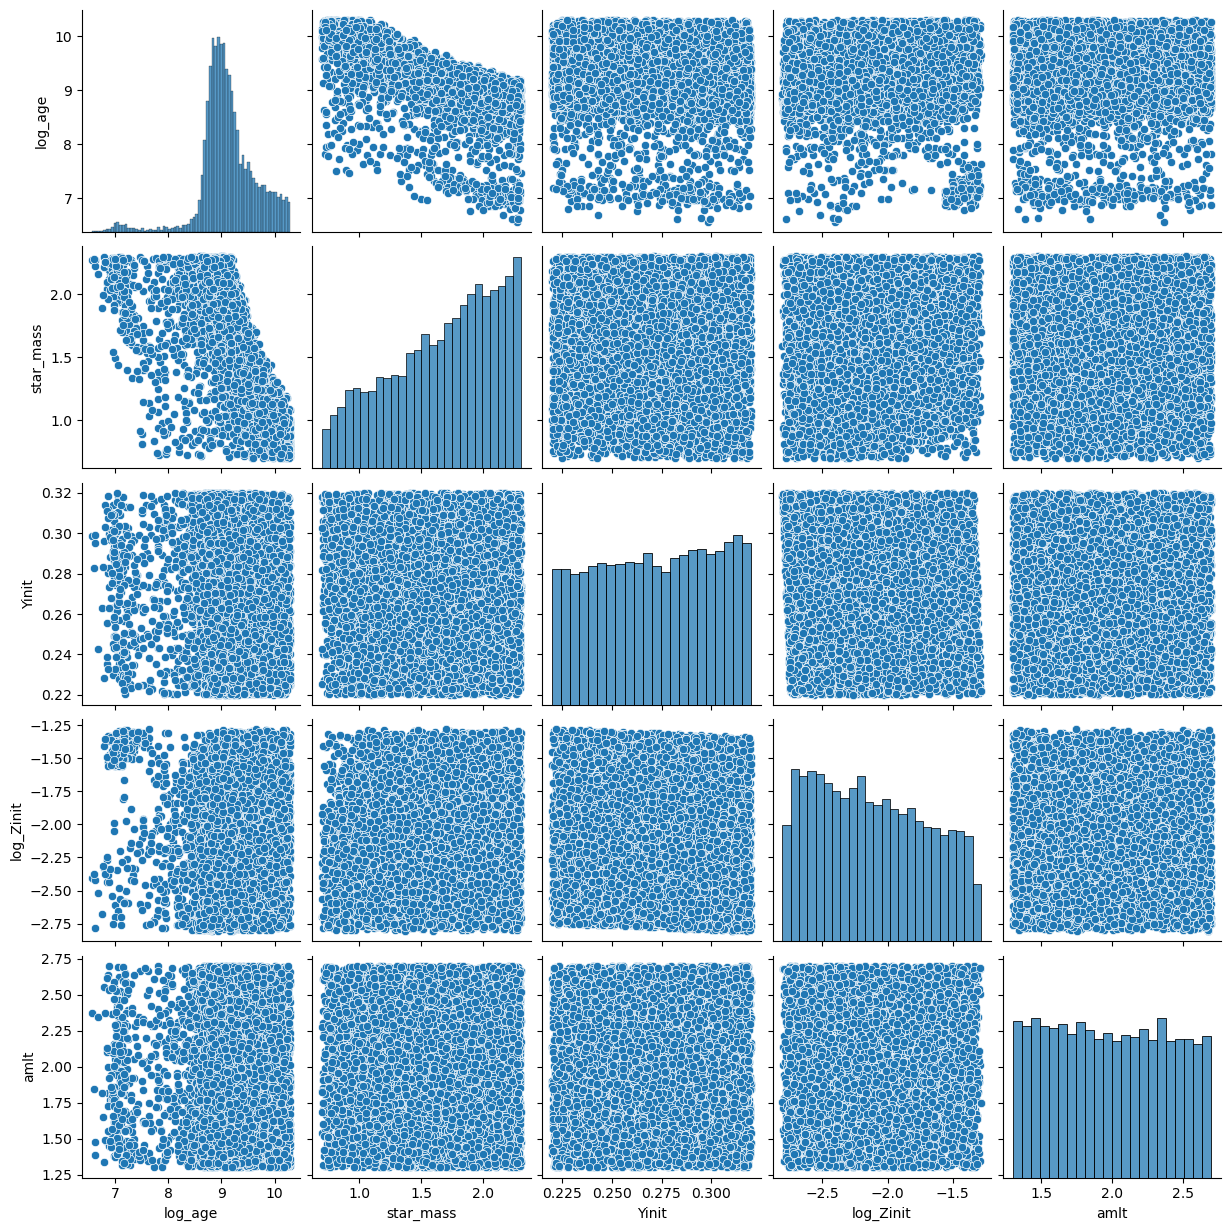

In [20]:
vars = ["log_age", "star_mass", "Yinit", "log_Zinit", "amlt"]
sns.pairplot(grid.sample(num_samples), vars=vars);

In [21]:
grid["log_Lnuc"]

track  star
7000   1       0.078416
       2       0.077135
       3       0.075916
       4       0.075178
       5       0.075810
                 ...   
4999   495     1.745635
       496     1.751302
       497     1.755578
       498     1.764923
       499     1.775576
Name: log_Lnuc, Length: 6288606, dtype: float64

In [ ]:
grid["lum"] = 

In [22]:
solar_teff = 5777.
grid["radius"]**2 * (grid["Teff"]/solar_teff)**4

track  star
7000   1        1.188519
       2        1.179026
       3        1.174553
       4        1.181679
       5        1.184066
                 ...    
4999   495     55.788393
       496     56.534474
       497     57.082894
       498     58.323680
       499     59.772300
Length: 6288606, dtype: float64

In [33]:
solar_teff = 5772.0034291
grid["L"] = grid["radius"]**2 * (grid["Teff"]/solar_teff)**4

In [34]:
grid["Lnuc"] = 10**grid["log_Lnuc"]

In [53]:
grid["f_nuc"] = grid["Lnuc"]/grid["L"]

In [49]:
thin = 1000
idx = grid.index.get_level_values("track").unique()[::thin]

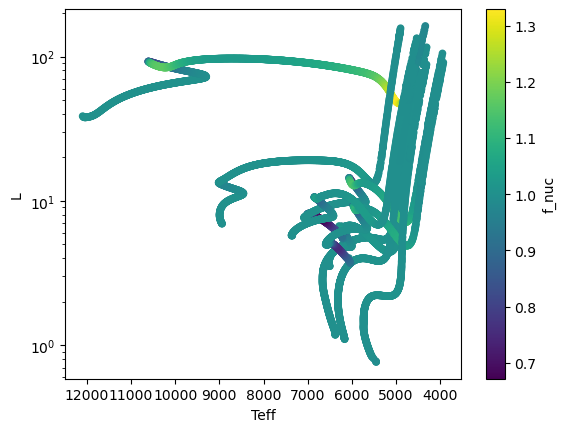

In [55]:
ax = grid.loc[idx].plot(x="Teff", y="L", c="f_nuc", kind="scatter")
ax.invert_xaxis()
ax.set_yscale("log")

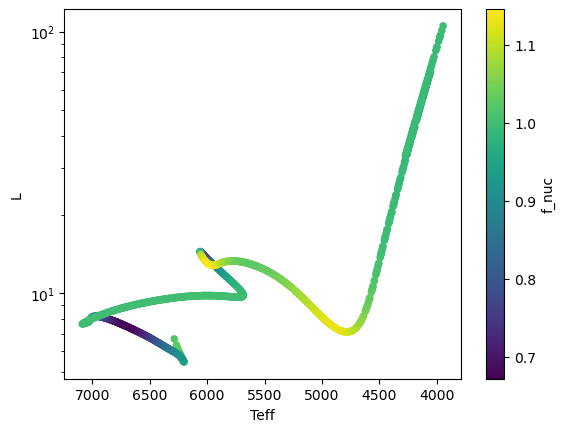

In [61]:
ax = grid.loc[idx[4]].plot(x="Teff", y="L", c="f_nuc", kind="scatter")
ax.invert_xaxis()
ax.set_yscale("log")

In [62]:
grid.loc[idx[4]]

star_mass     Yinit     Zinit      amlt  fov_core  fov_shell  \
star                                                                 
1        1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
2        1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
3        1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
4        1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
5        1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
...         ...       ...       ...       ...       ...        ...   
828      1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
829      1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
830      1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
831      1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   
832      1.9605  0.243599  0.047151  1.701141   0.01513   0.006041   

          star_age     radius         Teff  center_h1    log_LHe  log_Lnuc  \
star                                                                         
1     1.292086e+07   2.182487  6286.223750   0.708971 -43.796784  0.833586   
2     1.310107e+07   2.136619  6266.427022   0.708940 -43.825738  0.813549   
3     1.320920e+07   2.112531  6254.673993   0.708920 -43.844004  0.801091   
4     1.331733e+07   2.091700  6243.573162   0.708901 -43.861916  0.788963   
5     1.338220e+07   2.080385  6237.274330   0.708889 -43.872300  0.781771   
...            ...        ...          ...        ...        ...       ...   
828   2.372510e+09  20.527289  3976.080635   0.000000  -7.167416  1.974823   
829   2.372585e+09  20.576417  3975.012154   0.000000  -7.167540  1.975990   
830   2.372939e+09  20.802023  3970.144108   0.000000  -7.167624  1.983261   
831   2.373732e+09  21.350695  3958.373962   0.000000  -7.165587  2.001230   
832   2.374546e+09  21.931392  3946.470380   0.000000  -7.159959  2.019288   

      Dnu_freq_o     eps_o  log_Zinit   log_age           L        Lnuc  \
star                                                                      
1      58.041535  0.585671  -1.326512  7.111291    6.701260    6.816881   
2      59.892346  0.653448  -1.326512  7.117307    6.342021    6.509515   
3      60.896302  0.693345  -1.326512  7.120876    6.153446    6.325438   
4      61.787453  0.729604  -1.326512  7.124417    5.989976    6.151250   
5      62.281428  0.749545  -1.326512  7.126528    5.901474    6.050215   
...          ...       ...        ...       ...         ...         ...   
828     2.004353  0.702675  -1.326512  9.375208   94.880642   94.367700   
829     1.997222  0.701806  -1.326512  9.375222   95.232907   94.621502   
830     1.965009  0.697878  -1.326512  9.375287   96.856756   96.219139   
831     1.890169  0.688702  -1.326512  9.375432  100.828888  100.283560   
832     1.815955  0.679700  -1.326512  9.375581  105.114214  104.541302   

         f_nuc  
star            
1     1.017253  
2     1.026410  
3     1.027951  
4     1.026924  
5     1.025204  
...        ...  
828   0.994594  
829   0.993580  
830   0.993417  
831   0.994592  
832   0.994550  

[832 rows x 19 columns]

In [64]:
np.log10(0.047151)

-1.326509092112729

What is the high metallicity double-hook? Looks like pre-main sequence.